In [1]:
# 实现ε-greedy、玻尔兹曼策略和UCB策略来平衡利用和探索
# 测试实例是摇动3个赌博机
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class KB_Game:
    def __init__(self, *args, **kwargs):
        self.q = np.array([0.0, 0.0, 0.0])     # 每个臂的平均回报
        self.action_counts = np.array([0,0,0])   # 摇动每个臂的次数
        self.current_cumulative_rewards = 0.0    # 当前累计回报
        self.actions = [1,2,3]     # 分别代表摇动3个不同的臂
        self.couts = 0   # 玩的次数
        self.couts_history = []
        self.cumulative_rewards_history = []
        self.a = 1
        self.reward = 0.0
    
    def step(self, a):
        '''模拟多臂赌博机的回报'''
        r = 0
        if a == 1:
            r = np.random.normal(1,1)
        if a == 2:
            r = np.random.normal(2,1)
        if a == 3:
            r = np.random.normal(1.5,1)
        return r
    
    def choose_action(self, policy, **kwargs):
        if policy == 'e_greedy':
            if np.random.random() < kwargs['epsilon']:
                action = np.random.randint(1,4)
            else:
                action = np.argmax(self.q) + 1
        if policy == 'ucb':
            c_ratio = kwargs['c_ratio']
            if 0 in self.action_counts:
                action = np.where(self.action_counts==0)[0][0] + 1
            else:
                value = self.q + c_ratio*np.sqrt(np.log(self.couts) / self.action_counts)
                action = np.argmax(value) + 1
        if policy == 'boltzmann':
            tau = kwargs['tau']
            p = np.exp(self.q/tau)/(np.sum(np.exp(self.q/tau)))
            action = np.random.choice([1,2,3], p = p.ravel())
        return action
    
    def train(self, play_total, policy, **kwargs):
        reward_1 = []
        reward_2 = []
        reward_3 = []
        
        for i in range(play_total):
            action = 0
            if policy == 'e_greedy':
                action = self.choose_action(policy, epsilon=kwargs['epsilon'])
            if policy == 'ucb':
                action = self.choose_action(policy, c_ratio = kwargs['c_ratio'])
            if policy == 'boltzmann':
                action = self.choose_action(policy, tau = kwargs['tau'])
            self.a = action
            
            self.r = self.step(self.a)
            self.couts += 1
            
            # 更新值函数
            self.q[self.a-1] = (self.q[self.a-1]*self.action_counts[self.a-1]+self.r) / (self.action_counts[self.a-1]+1)
            reward_1.append([self.q[0]])
            reward_2.append([self.q[1]])
            reward_3.append([self.q[2]])
            self.current_cumulative_rewards += self.r
            self.cumulative_rewards_history.append(self.current_cumulative_rewards)
            self.couts_history.append(i)
    
    def reset(self):
        self.q = np.array([0.0, 0.0, 0.0])
        self.action_counts = np.array([0,0,0])
        self.current_cumulative_rewards = 0.0
        self.couts = 0
        self.couts_history = []
        self.cumulative_rewards_history = []
        self.a = 1
        self.reward = 0.0
    
    def plot(self, colors, policy):
        plt.plot(self.couts_history, self.cumulative_rewards_history, colors, label=policy)
        plt.legend()
        plt.xlabel('n', fontsize=18)
        plt.ylabel('total reward', fontsize=18) 

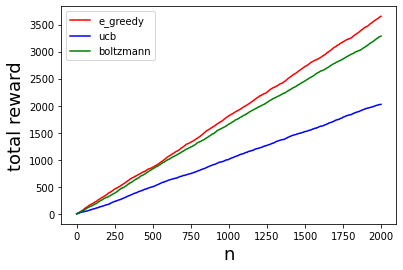

In [3]:
np.random.seed(0)
k_gamble = KB_Game()
plt.figure()
    
total = 2000
k_gamble.train(play_total=total, policy='e_greedy', epsilon=0.05)
k_gamble.plot(colors='r', policy='e_greedy')
k_gamble.reset()
k_gamble.train(play_total=total, policy='ucb', c_ratio=0.5)
k_gamble.plot(colors='b', policy='ucb')
k_gamble.reset()
k_gamble.train(play_total=total, policy='boltzmann', tau=1)
k_gamble.plot(colors='g', policy='boltzmann')
plt.show()